# Model Selection
You have to use Dataset-1 for this experiment. Dataset-1 consists of train, validation, and
test files. The input is a real valued scalar and the output is also a real valued scalar. The
dataset is generated from an n-degree polynomial and a small Gaussian noise is added to
the target.

1. Fit a 20-degree polynomial to the data. Report the training and validation MSE (Mean-Square Error). Do not use any regularization. Visualize the fit. Comment about the quality of the fit.

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def getdata(filename):
    import csv
    import numpy as np
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)   
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)   
        
    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [3]:
X_train, Y_train = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_1_train.csv")
print(X_train.shape)
print(Y_train.shape)

X_valid, Y_valid = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_1_valid.csv")
print(X_valid.shape)
print(Y_valid.shape)

(50, 1)
(50, 1)
(50, 1)
(50, 1)


# computer Xm matrix that contains polynomial terms of X

In [4]:
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

In [5]:
Xm_train = getfeaturematrix (X_train,20)
feature_no = Xm_train.shape[1]
print(Xm_train.shape)

Xm_valid = getfeaturematrix (X_valid,20)
print(Xm_valid.shape)

(50, 21)
(50, 21)


# W Computation function

In [6]:
def computeW (Xm_train,Y_train):
    a = np.dot(Xm_train.T,Xm_train) 
    a = np.linalg.pinv(a)
    W = np.dot(a, np.dot(Xm_train.T,Y_train))
    return W

# MSE computation function

In [7]:
def computeMSE (Hypothesis,Y):
    MSE = np.mean((Hypothesis-Y)**2) 
    return MSE

# Compute hypothesis and MSE

In [8]:
MSE_traindata = []
MSE_validdata = []

W = computeW (Xm_train,Y_train)
  
Hypothesis_train = np.dot(Xm_train,W)
Hypothesis_valid = np.dot(Xm_valid,W)

MSE_traindata = computeMSE (Hypothesis_train,Y_train)
MSE_validdata = computeMSE (Hypothesis_valid,Y_valid)


In [9]:
MSE_traindata

856.9783

In [10]:
MSE_validdata

705.2237

Text(0,0.5,'value of Y')

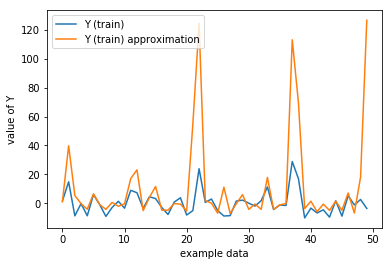

In [11]:
plt.plot(Y_train)
plt.plot(Hypothesis_train)
plt.legend(['Y (train)','Y (train) approximation'])
plt.xlabel('example data')
plt.ylabel('value of Y')
#plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig11.png')

# plotting Y approximation of validation data (Hypothesis_valid)

Text(0,0.5,'value of Y')

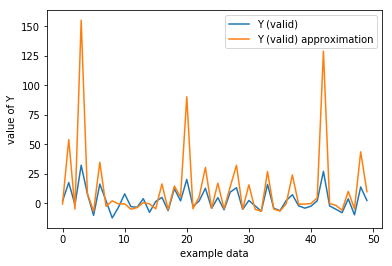

In [12]:
plt.plot(Y_valid)
plt.plot(Hypothesis_valid)
plt.legend(['Y (valid)','Y (valid) approximation'])
plt.xlabel('example data')
plt.ylabel('value of Y')
#plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig12.png')

#Quality of the fit is really bad as we have found large MSE (Mean Square Error) for both fitting the training and validation data. Plotting the approximation of data along with the real value also support the statement